In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
initial_data=pd.read_csv('possum.csv')
data=initial_data[['hdlngth','skullw','totlngth','footlgth','earconch','belly']]
data=data.dropna()
print(data.head(10))


   hdlngth  skullw  totlngth  footlgth  earconch  belly
0     94.1    60.4      89.0      74.5      54.5   36.0
1     92.5    57.6      91.5      72.5      51.2   33.0
2     94.0    60.0      95.5      75.4      51.9   34.0
3     93.2    57.1      92.0      76.1      52.2   34.0
4     91.5    56.3      85.5      71.0      53.2   33.0
5     93.1    54.8      90.5      73.2      53.6   32.0
6     95.3    58.2      89.5      71.5      52.0   34.5
7     94.8    57.6      91.0      72.7      53.9   34.0
8     93.4    56.3      91.5      72.4      52.9   33.0
9     91.8    58.0      89.5      70.9      53.4   32.0


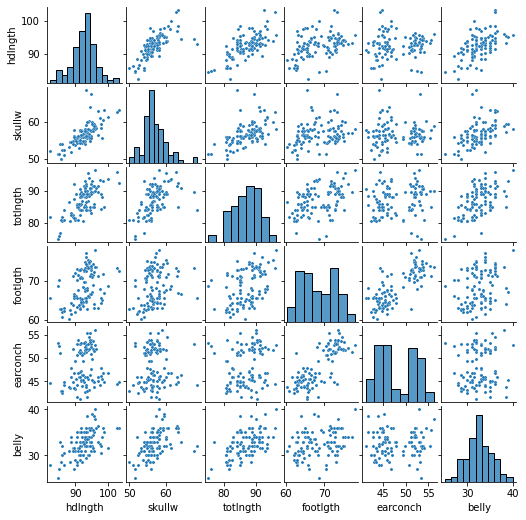

In [ ]:
data.describe()
g=sns.pairplot(data, plot_kws={"s": 10})
g.fig.set_size_inches(7,7)


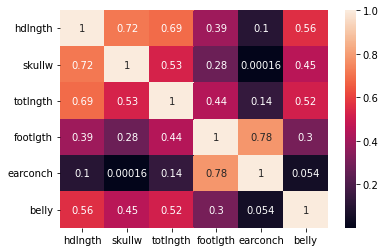

In [ ]:
data.corr()
ax = sns.heatmap(data.corr(), annot=True)

In [ ]:
data.describe()


,hdlngth,skullw,totlngth,footlgth,earconch,belly
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,92.643689,56.882524,87.128155,68.459223,48.206796,32.606796
std,3.566392,3.128629,4.312486,4.395306,4.055310,2.767680
min,82.500000,50.000000,75.000000,60.300000,41.300000,25.000000
25%,90.700000,54.950000,84.000000,64.600000,44.850000,31.000000
50%,92.800000,56.300000,88.000000,68.000000,46.800000,32.500000
75%,94.750000,58.100000,90.000000,72.500000,52.000000,34.250000
max,103.100000,68.600000,96.500000,77.900000,56.200000,40.000000


In [ ]:
print(st.pearsonr(data['hdlngth'], data['skullw']))
print(st.pearsonr(data['hdlngth'], data['totlngth']))
print(st.pearsonr(data['hdlngth'], data['footlgth']))
print(st.pearsonr(data['hdlngth'], data['earconch']))
print(st.pearsonr(data['hdlngth'], data['belly']))
print(st.pearsonr(data['skullw'], data['totlngth']))
print(st.pearsonr(data['skullw'], data['footlgth']))
print(st.pearsonr(data['skullw'], data['earconch']))
print(st.pearsonr(data['skullw'], data['belly']))
print(st.pearsonr(data['totlngth'], data['footlgth']))
print(st.pearsonr(data['totlngth'], data['earconch']))
print(st.pearsonr(data['totlngth'], data['belly']))
print(st.pearsonr(data['footlgth'], data['earconch']))
print(st.pearsonr(data['footlgth'], data['belly']))
print(st.pearsonr(data['earconch'], data['belly']))

(0.7161350133327717, 1.8483596754131903e-17)
(0.6878568585781478, 1.004487516815547e-15)
(0.39160534221110077, 4.304992404490106e-05)
(0.10200554448233891, 0.3052281903213548)
(0.5593136628174297, 8.201852060613148e-10)
(0.5291019496348398, 9.157200180157866e-09)
(0.2750592966729191, 0.004924481431492661)
(0.0001639965124326688, 0.998688222434201)
(0.45338777142669456, 1.5145779615635542e-06)
(0.4448317553510268, 2.5062877647057543e-06)
(0.1398850635183072, 0.15874890734450833)
(0.5161617114729192, 2.398811599148175e-08)
(0.7830498839764236, 1.4867033157210937e-22)
(0.30258354999077286, 0.0018926842808535916)
(0.05352355315533616, 0.5912949127456719)


 
0.4011 x + 9.792
6.0263656077947285


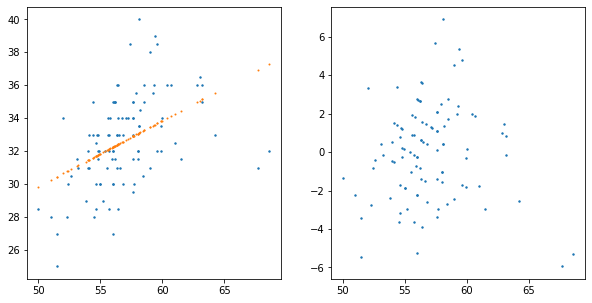

In [ ]:
pole1='skullw'
pole2='belly'
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(data[pole1], data[pole2],deg=1)
f = np.poly1d(z)
plt.scatter(data[pole1], data[pole2],s=2)
plt.scatter(data[pole1],f(data[pole1]),s=1)
print(f)
residuals = data[pole2]-f(data[pole1])
plt.subplot (1, 2, 2)
plt.scatter(data[pole1],residuals,s=2)
print(np.var(residuals))


           5           4        3         2
7.043e-05 x - 0.02055 x + 2.39 x - 138.4 x + 3997 x - 4.602e+04
4.922636663846109


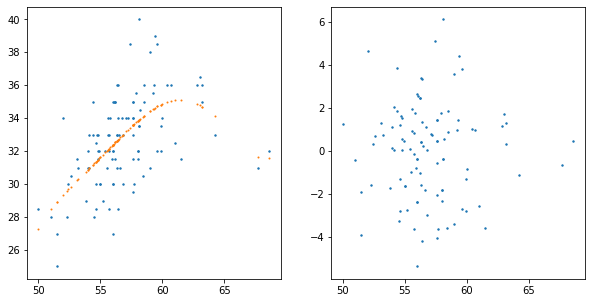

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(data[pole1], data[pole2],deg=5)
f = np.poly1d(z)
plt.scatter(data[pole1], data[pole2],s=2)
plt.scatter(data[pole1],f(data[pole1]),s=1)
print(f)
residuals = data[pole2]-f(data[pole1])
plt.subplot (1, 2, 2)
plt.scatter(data[pole1],residuals,s=2)
print(np.var(residuals))

Индекс корреляии:0.5925
Коэффициент корреляции Пирсона: 0.45339


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


0.5925049214101237

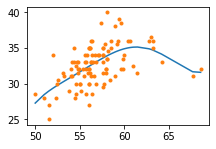

In [ ]:
def index_corr(x,y,k,deg_):
  N=len(x)
  sred=np.sum(y)/N
  z=np.polyfit(x,y,deg=deg_)
  Y=np.zeros(N)
  for i in range(N):
    for j in range(deg_+1):
      Y[i]+=z[j]*x[i]**(deg_-j)
  sum1=0
  sum2=0
  for i in range(N):
    sum1+=(y[i]-Y[i])**2
    sum2+=(y[i]-sred)**2
  index_corr=math.sqrt(1-sum1/sum2)
  sub_=plt.subplot(4,4,k)
  print('Индекс корреляии:'+str(np.round(index_corr,5)))
  print('Коэффициент корреляции Пирсона: '+str(np.round(np.corrcoef(x,y)[0,1],5)))
  x_=np.zeros((N,2))
  x_[:,0]=x
  x_[:,1]=Y
  x_=x_[np.argsort(x_[:,0])]
  sub_.plot(x_[:,0],x_[:,1],'-')
  sub_.plot(x,y,".")
  return index_corr

plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
index_corr(data[pole1].tolist(),data[pole2].tolist(),1,5)

In [ ]:
y=data['hdlngth'].values
x=data[['skullw','belly']].values.T
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0],x[1], ones)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     69.66
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.13e-19
Time:                        14:51:32   Log-Likelihood:                -231.68
No. Observations:                 103   AIC:                             469.4
Df Residuals:                     100   BIC:                             477.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6637      0.083      8.028      0.0